# DTEK0042 Exercise 3
    Group Members:
    1. Niko Itänen
    2. Tea Suovuori

*** Note for Google Colab Users ***
     Because Google Colab doesn't have a button to convert your notebook to .html format here is a quick work around:
   1. open a new google colab notebook
   2. in the files section in google colab, upload the .ipynb file you want to be converted to .html
   3. in your new open notebook run this command in an empty cell: !jupyter nbconvert --to html YourFileName.ipynb
   4. after the command is finished running refresh the page
   5. In your files section you should see your original .ipynb file that you uploaded and then a .html file of that same notebook.
   6. download the .html file and you're good to go!

In this exercise, you are required to analyze a PPG signal step-by-step as outlined below.  The deliverables for this exercise are a jupyter notebook and a .html file exported form the notebook. The notebook should includes your code, observations, graphs, and conclusions made upon analyzing the given PPG signal. Please provide caption and description for every figure. 

## 1- library Imports

In [19]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 2- Data Import and plotting
* Import the PPG signal data “PPG_record.txt” into your python environment and store it in a variable named “PPG_data”.
* The first column contains timestamp of samples, the second one contains red, the third one contains infrared (IR), and the last column contains green sensor data. 
* Take IR signal and store it in a variable called “PPG_sig”.  
* Note: the sampling frequency of this signal is 132 Hz. 
* Plot the IR signal stored in "PPG_sig" VS Time in seconds
* When plotting the data "PPG_sig" vs time in seconds, use the function np.linspace to make a seconds array using the length of "PPG_sig" and the sampling frequency of 132 Hz. Do not use the timestamp column of the data.

     HINT: 
         PPG_data = np.loadtxt(the directory of the PPG Data) 
         
         or
         
         PPG_data = pd.read_csv(the directory of the PPG Data, names = [name for each column])
         * Note: If you are using pandas to load into data, we'd recommend you convert pandas series data to numpy type for further analysis

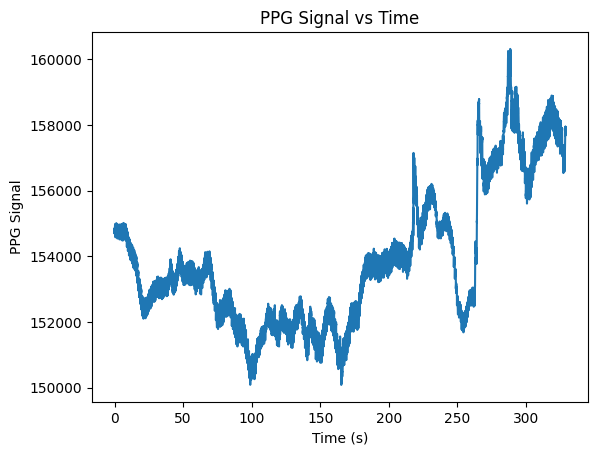

In [20]:
# Import the PPG signal from data directory
PPG_data = pd.read_csv('data/PPG_record.txt', sep=',', header=None)

# Convert pandas series to numpy type
PPG_data = PPG_data.to_numpy()

# Store the IR signal
PPG_sig = PPG_data[:, 2]

# Store the sampling rate (Hz)
sampling_rate = 132
time_seconds = np.linspace(0, len(PPG_sig)/sampling_rate, len(PPG_sig))

#Plot the PPG_signal VS Time in seconds by using np.linspace and len() function of "PPG_signal" and "sampling_rate"
plt.plot(time_seconds, PPG_sig)
plt.title('PPG Signal vs Time')
plt.xlabel('Time (s)')
plt.ylabel('PPG Signal')
plt.show()

# 3- Compute power spectral density (PSD)

 * Compute power spectral density (PSD) using the Welch method provided by scipy package.  Select only the frequencies between 0.7 and 3Hz since the human heart rate typically does not go beyond these limits. 
 * Plot the limited PSD versus frequency
 * Find the dominant PSD value and its corresponding frequency. 
 * Store the value of the found frequency component in a variable named “dominant_freq”. 
 * Reference:
 https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.welch.html#scipy.signal.welch
 
      
      HINT: 
        PSD_freqs , PSD = scipy.signal.welch() 
        Set the nperseg parameter to be = 10*Fs
        

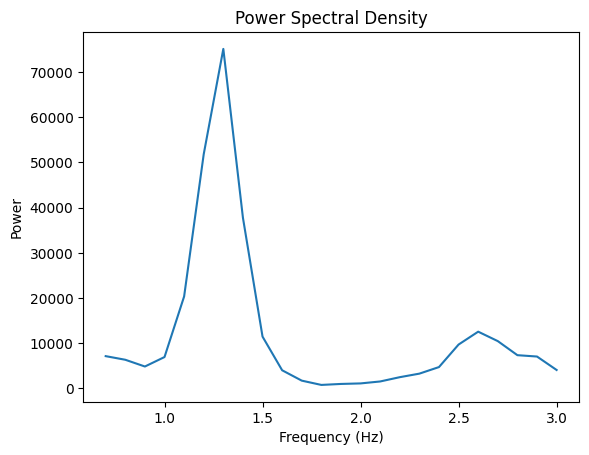

The dominant frequency PSD value of 75103.19231029775 is in: 1.3 Hz


In [21]:
# Compute PSD using Welch's method
PSD_freqs, PSD = scipy.signal.welch(PPG_sig, fs=sampling_rate, nperseg=10*sampling_rate)

#Limit the PSD to the range of 0.7 to 3 Hz
freq_range_mask = (PSD_freqs >= 0.7) & (PSD_freqs <= 3)
PSD_freqs = PSD_freqs[freq_range_mask]
PSD = PSD[freq_range_mask]

# Plot the PSD
plt.plot(PSD_freqs, PSD)
plt.title('Power Spectral Density')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.show()

# Find the frequency with the maximum power in the PSD and print the results
dominant_freq = PSD_freqs[np.argmax(PSD)]
max_PSD = np.max(PSD)
print(f"The dominant frequency PSD value of {max_PSD} is in: {dominant_freq} Hz")

# 4- Band Pass Filter Design and Filtering of PPG signal
*  Design a band pass filter. Use Butterworth filter of order 4 with cutoff frequencies equal to (dominant_freq – 0.3) and (dominant_freq + 0.3).

* Filter the original PPG signal with the designed filter. 

* Plot the filtered PPG signal showing heartbeats in the form of a sinusoid


* Note: the documentation of scipy package online is very comprehensive and informative. there are examples that 
  you can easily follow and use to solve the given exercise here. 
  https://docs.scipy.org/doc/scipy-0.14.0/reference/signal.html    
    
   
      HINT: 
        from scipy.signal import butter, filtfilt, freqz
    

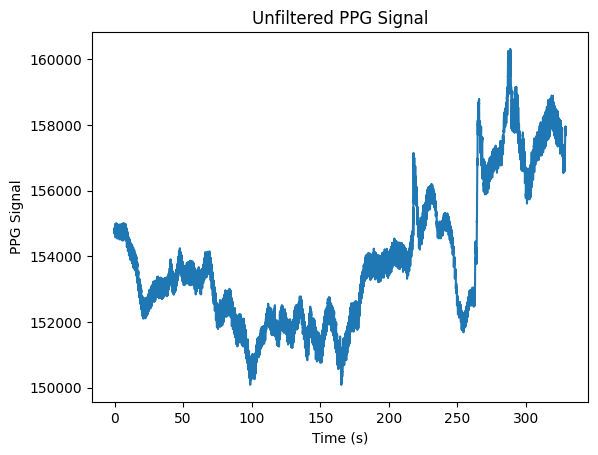

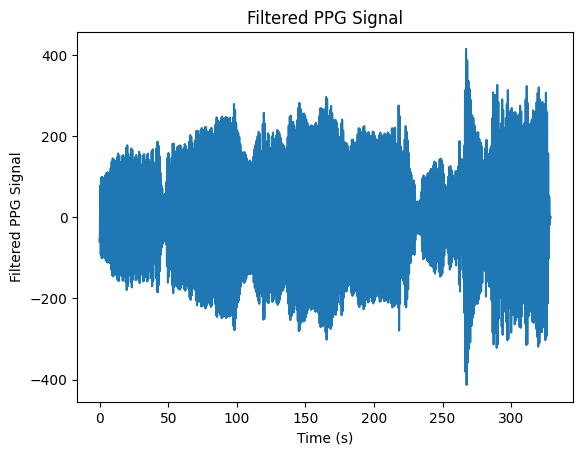

In [22]:
# Import the necessary functions
from scipy.signal import butter, freqz, filtfilt

# Define the Butterworth bandpass filter of order 4
def butter_bandpass(lowcut, highcut, fs, order):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


# Function to plot the frequency response of the filter
def plot_frequency_response(lowcut, highcut, fs, order):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    w, h = freqz(b, a)
    plt.plot((fs * 0.5 / np.pi) * w, abs(h), label=f"Order = {order}")

# Define the bandpass filter parameters
lowcut = dominant_freq - 0.3
highcut = dominant_freq + 0.3
order = 4

# Filter the PPG signal using the bandpass filter
b, a = butter_bandpass(lowcut, highcut, fs=sampling_rate, order=order)
filtered_PPG = filtfilt(b, a, PPG_sig)

#Plot the original PPG signal
plt.plot(time_seconds, PPG_sig)
plt.title('Unfiltered PPG Signal')
plt.xlabel('Time (s)')
plt.ylabel('PPG Signal')
plt.show()

# Plot the PPG signal showing heartbeats in the form of sinusoidal waves
plt.plot(time_seconds, filtered_PPG)
plt.title('Filtered PPG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Filtered PPG Signal')
plt.show()

## Observations:

- The filtered signal looks smoother and more stable because of the filtering and the sinusoidal waveform.

- The filtered signal also has much less noise, making it much easier to read the peaks.

- The peaks of the filtered signal have a much smoother appearance. We can see that the amplitudes vary less after the signal has been filtered, once the artefacts and irregularities have been smoothed out.

- Even after filtering, we can see that large movements (possibly caused by user movements) have a big impact on the final result.

- Futher artifact removal techniques such as motion artifact correction or adaptive filtering may increase the accuracy of final result.

# 5- Find the maximum extrema points (or peaks) of the signal
* The distance between every two consecutive peak location correlates with the RR interval.
* Find the peaks of the filtered signal in the time domain.
* Calculate these peak-to-peak intervals, store it in a variable named “RR_intervals” and report the average value of these intervals. 
* Convert the computed average value to heart rate as shown below and report it
* You can use “argrelextrema” function in scipy package for peak detection
* Plot Filtered PPG With peak locations
* Describe your observations below
* Reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.argrelextrema.html

      HINT:
        from scipy.signal import argrelextrema
        HeartRate = 60.0/avg_peak_intervals 

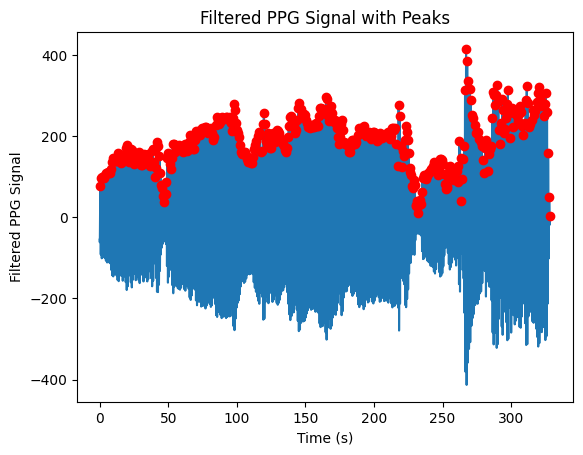

The average peak interval is: 0.7648512728743883
The heart rate is: 78.446623713541 bpm


In [23]:
# Calculate the distance between every consecutive peak with the RR interval
from scipy.signal import argrelextrema

# Find the peaks in the filtered PPG signal time domain
peaks_idx = argrelextrema(filtered_PPG, np.greater)[0]
peaks_time = time_seconds[peaks_idx]
RR_intervals = np.diff(peaks_time)
avg_peak_intervals = np.mean(RR_intervals)

# Plot the peaks on the filtered PPG signal
plt.plot(time_seconds, filtered_PPG)
plt.plot(peaks_time, filtered_PPG[peaks_idx], 'ro')
plt.title('Filtered PPG Signal with Peaks')
plt.xlabel('Time (s)')
plt.ylabel('Filtered PPG Signal')
plt.show()

# Print the RR intervals
print(f"The average peak interval is: {avg_peak_intervals}")

# Convert the average value to heart rate
heart_rate = 60 /avg_peak_intervals

# Print the heart rate
print(f"The heart rate is: {heart_rate} bpm")

## Observations: 

- The figure shows that the RR intervals are fairly consistent, although the amplitudes still vary widely. With this information we can calculate the patient's heart rate.

- The heart rate seems to settle within the normal resting heart rate range, which ensures that our result looks correct. (1)

# 6- Calculate SDNN and RMSSD
* AVNN is average of the time interval between successive normal heart beats. 
* SDNN is standard deviation of the time interval between successive normal heart beats (i.e. the RR-intervals).
* RMSSD is the Root mean square of successive RR interval differences.

* Calculate AVNN, SDNN and RMSSD from the “RR_intervals” variable. 
* These are heart rate variability parameters. Report the AVNN, SDNN and RMSSD values. 
* RMSSD formula can be found in https://www.biopac.com/application/ecg-cardiology/advanced-feature/rmssd-for-hrv-analysis/

* Note: Time unit for intervals should be in millisecond.
   
   HINT:
        Use np.diff(RR_intervals) to calculate the difference between successive rr intervals
        Use np.std() for SDNN
        

In [24]:
# Define the all variables AVNN, SDNN, RMSSD

AVNN = np.mean(RR_intervals) # AVNN is the average of all RR intervals
SDNN = np.std(np.diff(RR_intervals)) # SDNN is the standard deviation of all RR intervals
RMSSD = np.sqrt(np.mean(np.diff(RR_intervals)**2)) # RMSSD is the root mean square of the squared differences between adjacent RR intervals

# Print the results
print(f"The AVNN is: {AVNN}")
print(f"The SDNN is: {SDNN}")
print(f"The RMSSD is: {RMSSD}")

The AVNN is: 0.7648512728743883
The SDNN is: 0.03436006499745041
The RMSSD is: 0.034360083234749275


## Observations:

- AVNN shows the correct value of the peaks, because we have already calculated and proven it to be correct.

- Our SDNN value of 34 milliseconds shows that there is some variation in RR intervals, which is normal for healthy heart function. A lower SDNN value may indicate reduced heart variability associated with stress or health problems. (2)

- RMSSD is used to assess the function of the parasympathetic nervous system, which regulates the variability of a patient's heartbeat. RMSSD should be quite similar to SDNN in healthy individuals, which is our result. An RMSSD value of 34 milliseconds suggests a moderate level of short-term heart rate variability, indicating that the patient's autonomic function is normal and he/she does not have significant arrhythmias. (2)

### References:

(1): Kannel WB, Kannel C, Paffenbarger RS Jr, Cupples LA. Heart rate and cardiovascular mortality: the Framingham Study. Am Heart J. 1987 Jun;113(6):1489-94. doi: 10.1016/0002-8703(87)90666-1. PMID: 3591616.

(2) Shaffer F, Ginsberg JP. An Overview of Heart Rate Variability Metrics and Norms. Front Public Health. 2017 Sep 28;5:258. doi: 10.3389/fpubh.2017.00258. PMID: 29034226; PMCID: PMC5624990.